In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image = cv2.imread('DarkGreen.jpg')
import pandas as pd
from skimage import data, filters
from skimage.segmentation import flood

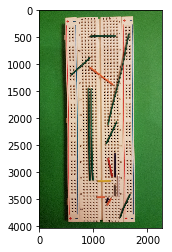

In [2]:
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

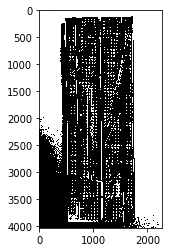

In [3]:
#RGB
lower_green = np.array([0, 100, 0])     ##[R value, G value, B value]
upper_green = np.array([200, 255, 200]) 
mask = cv2.inRange(image_copy, lower_green, upper_green)
plt.imshow(mask, cmap='gray')

In [4]:
#HSV
hand_hsv = cv2.cvtColor(image_copy, cv2.COLOR_RGB2HSV)



hand_flattened = []

for index in range(3):
    flattenedArr = np.array(hand_hsv[:, :, index]).flatten()
    arrPD = pd.Series(flattenedArr)
    hand_flattened.append(arrPD)
low = []
high = []


def restrict(color_component):
    return np.clip(color_component, 0, 255)

z_value = 5.5

for i in range(3):
    mu = hand_flattened[i].values.mean()
    print(mu)
    sigma = hand_flattened[i].values.std()
    deviation = z_value*sigma
    low.append(restrict(mu-deviation))
    high.append(restrict(mu+deviation))

print(low)
print(high)

37.101240123106855
120.49156232065872
156.67414727593712
[0.0, 0.0, 0.0]
[170.63551121793338, 255.0, 255.0]


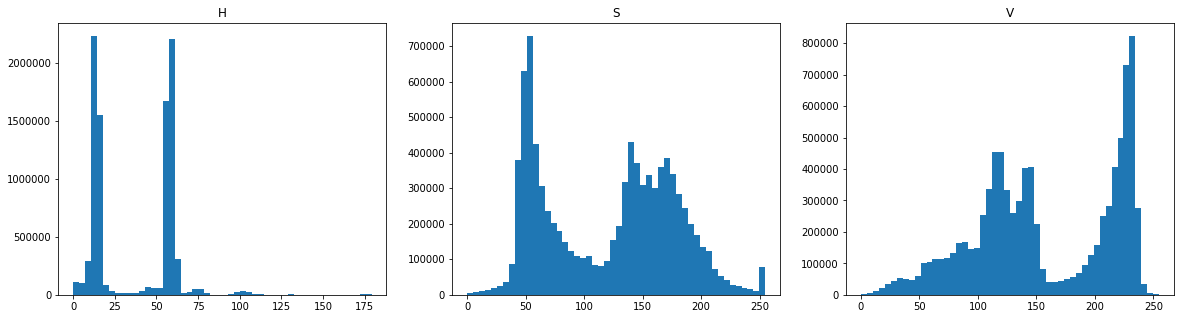

In [5]:

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))
ax1.set_title("H")
ax1.hist(hand_flattened[0], bins=50)
ax2.set_title("S")
ax2.hist(hand_flattened[1], bins=50)
ax3.set_title("V")
ax3.hist(hand_flattened[2], bins=50)
plt.show()

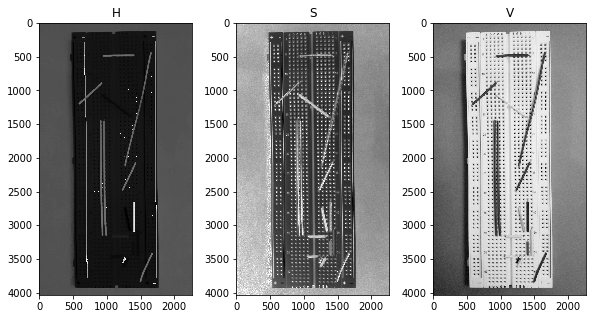

In [23]:
h = hand_hsv[:, :, 0]
s = hand_hsv[:, :, 1]
v = hand_hsv[:, :, 2]

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,5))
ax1.set_title("H")
ax1.imshow(h, cmap="gray")
ax2.set_title("S")
ax2.imshow(s, cmap="gray")
ax3.set_title("V")
ax3.imshow(v, cmap="gray")
plt.show()

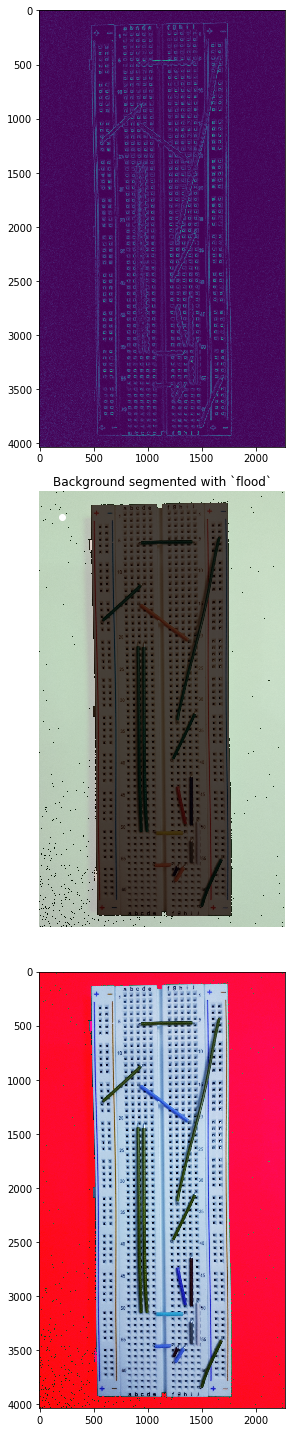

In [22]:
fig, ax = plt.subplots(nrows=3, figsize=(10, 20))

sobel = filters.sobel(image_copy[:,:, 2])
ax[0].imshow(sobel)
floodMask = flood(sobel, (240, 265), tolerance=0.02)
ax[1].imshow(image_copy)
ax[1].imshow(floodMask, cmap=plt.cm.gray, alpha=0.7)
ax[1].plot(205, 240, 'wo')  # seed point
ax[1].set_title('Background segmented with `flood`')
ax[1].axis('off')
imagec2 = np.copy(image)


imagec2[floodMask,0] = np.mean(image_copy)
imagec2[floodMask,1] = 10
ax[2].imshow(imagec2)
ax[1].axis('off')

fig.tight_layout()
plt.show()